# ANALISIS DE CLIENTES Y PATRONES DE COMPRA EN Y.AFISHA

El proyecto implica contribuir a la optimización de los gastos de marketing de Y.Afisha con datos desde enero de 2017 hasta diciembre de 2018. El proyecto incluye entender cómo los usuarios utilizan el producto, identificar cuándo inician sus compras, determinar cuánto ingreso genera cada cliente y analizar los momentos en que realizan los pagos.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#INICIALIZACION" data-toc-modified-id="INICIALIZACION-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>INICIALIZACION</a></span></li><li><span><a href="#CARGA-DE-DATOS" data-toc-modified-id="CARGA-DE-DATOS-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>CARGA DE DATOS</a></span></li><li><span><a href="#EXPLORACIÓN-Y-PROCESAMIENTO-DE-DATOS" data-toc-modified-id="EXPLORACIÓN-Y-PROCESAMIENTO-DE-DATOS-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EXPLORACIÓN Y PROCESAMIENTO DE DATOS</a></span><ul class="toc-item"><li><span><a href="#TABLA-1:-VISITAS-A-PÁGINA-WEB" data-toc-modified-id="TABLA-1:-VISITAS-A-PÁGINA-WEB-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>TABLA 1: VISITAS A PÁGINA WEB</a></span></li><li><span><a href="#TABLA-2:-COMPRAS-REALIZADAS-EN-PAGINA-WEB" data-toc-modified-id="TABLA-2:-COMPRAS-REALIZADAS-EN-PAGINA-WEB-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>TABLA 2: COMPRAS REALIZADAS EN PAGINA WEB</a></span></li><li><span><a href="#TABLA-3:-COSTOS-POR-FUENTE-DE-ANUNCIO" data-toc-modified-id="TABLA-3:-COSTOS-POR-FUENTE-DE-ANUNCIO-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>TABLA 3: COSTOS POR FUENTE DE ANUNCIO</a></span></li></ul></li><li><span><a href="#ANALISIS-DE-DATOS" data-toc-modified-id="ANALISIS-DE-DATOS-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ANALISIS DE DATOS</a></span><ul class="toc-item"><li><span><a href="#PRODUCTO" data-toc-modified-id="PRODUCTO-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>PRODUCTO</a></span></li><li><span><a href="#VENTAS" data-toc-modified-id="VENTAS-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>VENTAS</a></span></li><li><span><a href="#MARKETING" data-toc-modified-id="MARKETING-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>MARKETING</a></span></li></ul></li><li><span><a href="#CONCLUSIÓN" data-toc-modified-id="CONCLUSIÓN-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>CONCLUSIÓN</a></span></li></ul></div>

## INICIALIZACION

In [1]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats as st

## CARGA DE DATOS

In [2]:
url_1 = 'https://raw.githubusercontent.com/doalpinc98/webpage_analysis/main/visits_log_us.csv'
url_2 = 'https://raw.githubusercontent.com/doalpinc98/webpage_analysis/main/orders_log_us.csv'
url_3 = 'https://raw.githubusercontent.com/doalpinc98/webpage_analysis/main/costs_us.csv'
visits = pd.read_csv(url_1)
orders = pd.read_csv(url_2)
costs = pd.read_csv(url_3)

## EXPLORACIÓN Y PROCESAMIENTO DE DATOS

### TABLA 1: VISITAS A PÁGINA WEB 

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


La tabla visits (registros del servidor con datos sobre las visitas al sitio web): <br>
•	Uid: identificador único del usuario;<br>
•	Device: dispositivo del usuario;<br>
•	Start Ts: fecha y hora de inicio de la sesión;<br>
•	End Ts: fecha y hora de término de la sesión;<br>
•	Source Id: identificador de la fuente de anuncios de la que proviene el usuario.


In [4]:
visits = visits.rename(
    columns={'Device': 'device',
            'End Ts':'end_ts',
            'Source Id':'source_id',
            'Start Ts': 'start_ts',
            'Uid':'uid'}
)

In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start_ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [6]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format='%Y-%m-%dT%H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format='%Y-%m-%dT%H:%M:%S')
visits['source_id'] = visits['source_id'].astype('str')
visits['uid'] = visits['uid'].astype('str')


In [7]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  object        
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 13.7+ MB


In [8]:
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [9]:
visits.duplicated().sum()

0

Se observa que entre el año 2017 y 2018 existió 359400 datos registados.

### TABLA 2: COMPRAS REALIZADAS EN PAGINA WEB

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


La tabla orders (datos sobre pedidos):<br>
•	Uid: identificador único del usuario que realiza un pedido;<br>
•	Buy Ts: fecha y hora del pedido;<br>
•	Revenue: ingresos de Y.Afisha de este pedido.


In [11]:
orders = orders.rename(
    columns={'Buy Ts': 'buy_ts',
            'Revenue':'revenue',
            'Uid':'uid'}
)

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [13]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format='%Y-%m-%dT%H:%M:%S')
orders['uid'] = orders['uid'].astype('str')

In [14]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


orders.info()

In [15]:
orders.duplicated().sum()

0

Se registra 50415 registros de compras.

### TABLA 3: COSTOS POR FUENTE DE ANUNCIO 

In [16]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


La tabla costs (datos sobre gastos de marketing):<br>
•	source_id: identificador de la fuente de anuncios<br>
•	dt: fecha;<br>
•	costs: gastos en esta fuente de anuncios en este día.


In [17]:

costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%dT%H:%M:%S')
costs['source_id'] = costs['source_id'].astype('str')

In [18]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   object        
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 59.7+ KB


In [19]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [20]:
costs.duplicated().sum()

0

Se registra 2542 registros sobre gastos de marketing.

## ANALISIS DE DATOS

### PRODUCTO

In [21]:
# Uso del producto al día, semana y mes 
# Sesiones por día
# Duración por sesión
# Frecuencia de regreso del cliente


In [22]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
print(visits.head())

    device              end_ts source_id            start_ts  \
0    touch 2017-12-20 17:38:00         4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00         2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00         5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00         9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00         3 2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  


Para calcular la actividad diaria, semanal y mensual, primero se creará columnas separadas para año, mes y semana.

In [23]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.isocalendar().week
visits['session_date'] = visits['start_ts'].dt.date
print(visits.head())

    device              end_ts source_id            start_ts  \
0    touch 2017-12-20 17:38:00         4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00         2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00         5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00         9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00         3 2017-12-27 14:06:00   

                    uid  session_year  session_month  session_week  \
0  16879256277535980062          2017             12            51   
1    104060357244891740          2018              2             8   
2   7459035603376831527          2017              7            26   
3  16174680259334210214          2018              5            20   
4   9969694820036681168          2017             12            52   

  session_date  
0   2017-12-20  
1   2018-02-19  
2   2017-07-01  
3   2018-05-20  
4   2017-12-27  


Ahora se calculará las métricas del número de usuarios activos, agrupando por fecha para el cálculo de medias.

In [24]:
mau_total = (visits.groupby(['session_year', 'session_month'])
    .agg({'uid': 'nunique'})
    .mean())

dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()

wau_total = (visits.groupby(['session_year', 'session_week'])
    .agg({'uid': 'nunique'})
    .mean())


print(int(dau_total))
print(int(wau_total))
print(int(mau_total))

907
5716
23228


El número de usuarios activos diarios es 907. <br>
El número de usuarios activos semanales es 5716. <br>
El número de usuarios activos mensuales es 23228.

Esta métrica de vanidad juega un papel importante en la motivación del equipo. A continuación se analiza el factor de adherencia, que hace referencia a la lealtad de la audiencia a la marca y con qué frecuencia los usuarios regresan.

In [25]:
sticky_wau = dau_total / wau_total * 100
sticky_mau = dau_total / mau_total * 100

print(float(sticky_wau))
print(float(sticky_mau))

15.88440861589881
3.908969652437603


El factor de adherencia indica que los clientes tienen una lealtad baja hacia el negocio. La audiencia semanal es del 15.88%, mientras la audiencia mensual es de 3,91%

Es importante saber cuantos usuarios visitan la aplicación, sin embargo así mismo es necesario conocer que tanto tiempo pasan los usuarios dentro de la aplicación. Una sesión de usuario es el conjunto de acciones del usuario desde que abre la aplicación hasta que la finaliza. Se puede determinar el número de sesiones mensuales por usuario lo cual es un buen indicador de la frecuencia de uso de la aplicación.

In [26]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
sessions_per_user = visits.groupby(['session_year', 'session_month']).agg(
    {'uid': ['count', 'nunique']}
)
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users']
)
print(sessions_per_user)

                            n_sessions  n_users  sessions_per_user
session_year session_month                                        
2017         6                   16505    13259           1.244815
             7                   17828    14183           1.256998
             8                   14355    11631           1.234202
             9                   23907    18975           1.259921
             10                  37903    29692           1.276539
             11                  43969    32797           1.340641
             12                  41983    31557           1.330386
2018         1                   36939    28716           1.286356
             2                   37182    28749           1.293332
             3                   35679    27473           1.298693
             4                   26515    21008           1.262138
             5                   26635    20701           1.286653


En promedio, cada usuario/a pasa como máximo 1 sesión en la aplicación por mes. No parece que se use con mucha frecuencia.

Ahora es interesante conocer la duración del usuario por sesión. A esta métrica se la conoce como ASL Average Session Lenght o en español Duración media de la sesión. Dependiendo de la intención u objetivo de la página el indicador mientras mayor sea, mejor. Es por esta misma razón que existen otras métricas que permiten analizar la eficiencia y rentabilidad de la aplicación.

In [27]:
visits['session_duration_sec'] = (visits['end_ts']  - visits['start_ts']).dt.seconds
print(visits['session_duration_sec'].mean())

643.506488592098


AxesSubplot(0.125,0.125;0.775x0.755)


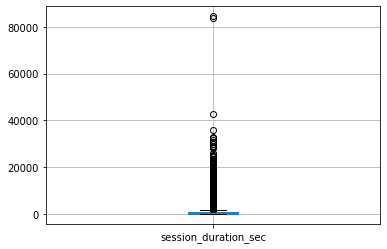

In [28]:
print(visits.boxplot('session_duration_sec'))

In [29]:
visits.describe()

,session_year,session_month,session_week,session_duration_sec
count,359400.000000,359400.000000,359400.000000,359400.000000
mean,2017.453395,6.616274,26.970907,643.506489
std,0.497824,3.855768,16.773920,1016.334786
min,2017.000000,1.000000,1.000000,0.000000
25%,2017.000000,3.000000,11.000000,120.000000
50%,2017.000000,7.000000,26.000000,300.000000
75%,2018.000000,10.000000,43.000000,840.000000
max,2018.000000,12.000000,52.000000,84480.000000


La duración de una sesión promedio es de 643 segundos (10,7 minutos) <br>
La duración de una sesión máxima es de 23 horas <br>
El 75% de las visitas en la aplicación duran menos de 840 segundos (14 minutos). <br>
Basado en esta información se presume que se dejó abierta la aplicación en el dispositivo electrónico.

<AxesSubplot:>

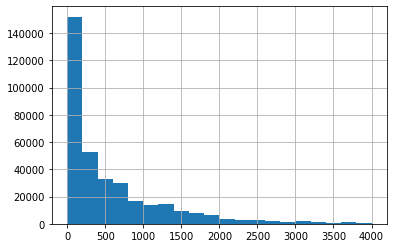

In [30]:
visits['session_duration_sec'].hist(bins=20, range=(0,4000))


In [31]:
print(visits['session_duration_sec'].mode())

0    60
dtype: int64


Cuando la duración media de la sesión comienza a disminuir, es importante desarrollar hipótesis sobre la razón. Por ejemplo, tal vez la versión móvil de tu sitio sea difícil de usar, por lo que las sesiones de smartphones y tabletas terminan siendo muy cortas.

In [32]:
visits['device'].unique()

array(['touch', 'desktop'], dtype=object)

In [33]:
touch =visits[visits['device']=='touch'] 

In [34]:
touch.head(3)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017,11,44,2017-11-05,60


In [35]:
touch.describe()

,session_year,session_month,session_week,session_duration_sec
count,96833.000000,96833.000000,96833.000000,96833.000000
mean,2017.468043,6.516952,26.490215,479.619407
std,0.498980,3.847966,16.758874,752.531533
min,2017.000000,1.000000,1.000000,0.000000
25%,2017.000000,3.000000,10.000000,60.000000
50%,2017.000000,6.000000,25.000000,180.000000
75%,2018.000000,10.000000,43.000000,600.000000
max,2018.000000,12.000000,52.000000,30840.000000


In [36]:
desktop =visits[visits['device']=='desktop'] 

In [37]:
desktop.head(3)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0


In [38]:
desktop.describe()

,session_year,session_month,session_week,session_duration_sec
count,262567.000000,262567.000000,262567.000000,262567.000000
mean,2017.447992,6.652904,27.148183,703.946977
std,0.497289,3.858004,16.776021,1091.545596
min,2017.000000,1.000000,1.000000,0.000000
25%,2017.000000,3.000000,11.000000,120.000000
50%,2017.000000,7.000000,27.000000,360.000000
75%,2018.000000,10.000000,44.000000,900.000000
max,2018.000000,12.000000,52.000000,84480.000000


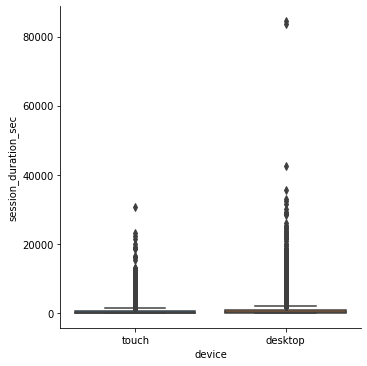

In [39]:
sns.catplot(data=visits, x="device", y="session_duration_sec", kind="box")

H0: La duración promedio en la aplicación usando el touch es igual a la duración promedio en la aplicación usando el desktop ".<br>
H1: La duración promedio en la aplicación usando el touch no es igual a la duración promedio en la aplicación usando el desktop.

In [40]:
p1 = touch['session_duration_sec'].head(600)
p2 = desktop['session_duration_sec'].head(600)

In [41]:
alpha = 0.05  # el nivel de significancia estadística crítica

results = st.ttest_rel(p1, p2)

print('valor p: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  6.683295523781714e-07
Rechazamos la hipótesis nula


Este resultado significa que el tiempo que pasa el usuario en la aplicación difiere en caso de utilizar el touch o el desktop. 

H0: σ12 = σ22 <br>
    H1: σ12 ≠ σ22

In [42]:
var_1 = np.var(touch['session_duration_sec'])
var_2 = np.var(desktop['session_duration_sec'])
var_max= max(var_1,var_2)
var_min= min(var_1,var_2)

In [43]:
Estadistico_F = var_max/var_min
Estadistico_F

2.1039585944422505

Cuando el valor del estadístico F (Fisher) es cercano a uno, se concluye que no existe suficiente evidencia estadística para rechazar la hipótesis nula. Sin embargo en este caso al ser 2, se concluye que los grupos tienen una varianza del tiempo de duración en la aplicación con diferencia significativa. 

### VENTAS

In [44]:
# Tiempo entre registro y conversión a cliente
# Comparación de conversiones
# Número de pedidos realizados durante un periodo de tiempo dado
# Tamaño promedio de la compra
# Tiempo de vida el cliente 

Si se conoce la fecha de los pedidos, se puede obtener la fecha de la primera compra y agrupar por dicho campo con el fin de formar los cohortes.Para cada cliente, se obtiene la fecha del primer pedido. 

In [45]:
first_order_date_by_customers = orders.groupby('uid')[
    'buy_ts'
].min()
print(first_order_date_by_customers.head())

uid
10000837700716403746   2017-06-21 16:12:00
10000997030965831953   2018-01-19 12:28:00
10001199569370567060   2017-11-25 17:29:00
10002243978166172255   2017-10-15 17:20:00
10003351403065971701   2017-11-20 13:18:00
Name: buy_ts, dtype: datetime64[ns]


Se realiza el renombre de la variable para evitar la duplicidad de nombre de variables. 

In [46]:
first_order_date_by_customers.name = 'first_order_date'
# acceder al atributo name del objeto Series en first_order_date_by_customers

A continuación, se utiliza el método join para unir el DataFrame orders con la Series first_order_date_by_customers por la columna 'uid' (identificador del cliente).

In [47]:
orders = orders.join(first_order_date_by_customers,on='uid')
print(orders.head(10))

               buy_ts  revenue                   uid    first_order_date
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00
5 2017-06-01 08:43:00     0.18  10402394430196413321 2017-06-01 08:43:00
6 2017-06-01 08:54:00     1.83  12464626743129688638 2017-06-01 08:54:00
7 2017-06-01 09:22:00     1.22   3644482766749211722 2017-06-01 09:22:00
8 2017-06-01 09:22:00     3.30  17542070709969841479 2017-06-01 09:22:00
9 2017-06-01 09:23:00     0.37   1074355127080856382 2017-06-01 09:23:00


In [48]:
orders['first_order_month'] = orders['first_order_date'].astype(
    'datetime64[M]'
)
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
print(orders.head(10))

               buy_ts  revenue                   uid    first_order_date  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   
5 2017-06-01 08:43:00     0.18  10402394430196413321 2017-06-01 08:43:00   
6 2017-06-01 08:54:00     1.83  12464626743129688638 2017-06-01 08:54:00   
7 2017-06-01 09:22:00     1.22   3644482766749211722 2017-06-01 09:22:00   
8 2017-06-01 09:22:00     3.30  17542070709969841479 2017-06-01 09:22:00   
9 2017-06-01 09:23:00     0.37   1074355127080856382 2017-06-01 09:23:00   

  first_order_month order_month  
0        2017-06-01  2017-06-01  
1        2017-06-01  2017-06-01  
2        2017-06-01  2017-06-01  
3        2017-06-01  2017-0

A continuación, la columna first_order_month se utilizará para formar cohortes.

In [49]:
cohort_grouped = orders.groupby('first_order_month').agg(
    {'uid': 'nunique', 'revenue': 'sum'}
)
print(cohort_grouped) 

                    uid   revenue
first_order_month                
2017-06-01         2023  24031.69
2017-07-01         1923  16127.92
2017-08-01         1370  11606.26
2017-09-01         2581  34676.32
2017-10-01         4340  27603.45
2017-11-01         4081  26098.99
2017-12-01         4383  33485.74
2018-01-01         3373  16663.13
2018-02-01         3651  16750.50
2018-03-01         3533  19273.41
2018-04-01         2276  11810.61
2018-05-01         2988  13925.76
2018-06-01            1      3.42


A breves razgos se puede concluir el número de usuarios disminuye de junio a agosto 2017, aumenta en septiembe octubre 2017, disminuye en noviembre y aumenta en diciembre. Es decir varía sin un patrón claro, por lo cual se continua con el análisis de los datos.

In [50]:
orders_grouped_by_cohorts = orders.groupby(
    ['first_order_month', 'order_month']
).agg({'revenue': 'sum', 'uid': 'nunique'})
print(orders_grouped_by_cohorts.head()) 

                               revenue   uid
first_order_month order_month               
2017-06-01        2017-06-01   9557.49  2023
                  2017-07-01    981.82    61
                  2017-08-01    885.34    50
                  2017-09-01   1931.30    54
                  2017-10-01   2068.58    88


In [51]:
orders.pivot_table(
    index='first_order_month',
    columns='order_month',
    values='uid',
    aggfunc='nunique',
)

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,2023.0,61.0,50.0,54.0,88.0,67.0,62.0,47.0,58.0,45.0,45.0,53.0,NaN
2017-07-01,NaN,1923.0,52.0,57.0,64.0,49.0,38.0,36.0,39.0,42.0,22.0,26.0,NaN
2017-08-01,NaN,NaN,1370.0,58.0,53.0,44.0,40.0,32.0,30.0,44.0,19.0,31.0,NaN
2017-09-01,NaN,NaN,NaN,2581.0,130.0,100.0,74.0,52.0,64.0,66.0,37.0,43.0,NaN
2017-10-01,NaN,NaN,NaN,NaN,4340.0,206.0,123.0,92.0,93.0,72.0,56.0,67.0,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,4081.0,222.0,120.0,106.0,81.0,48.0,62.0,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4383.0,146.0,103.0,97.0,50.0,63.0,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3373.0,114.0,83.0,43.0,45.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3651.0,118.0,58.0,39.0,NaN


Conclusiones basadas en la tabla: <br>
1. El número de clientes activos dentro de una cohorte disminuye después del primer mes.<br>
2. Los usuarios de la cohorte de abril 2018 representan la mayor parte de los clientes activos.

A continuación se analizará el comportamiento por ingreso de la cohorte por usuario.

In [52]:
## Queremos analizar por usuario
orders_grouped_by_cohorts['revenue_per_user'] = (
    orders_grouped_by_cohorts['revenue']
    / orders_grouped_by_cohorts['uid']
)

In [53]:
orders_grouped_by_cohorts.pivot_table(
    index='first_order_month',
    columns='order_month',
    values='revenue_per_user',
    aggfunc='mean',
)

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026,NaN


Se observa que los ingresos por usuario disminuyen con el pasar del tiempo.  Esto nos da una idea de si el ingreso promedio de los usuarios que continúan haciendo pedidos está aumentando o no.

Vamos a encontrar el ciclo de vida de la cohorte. Se restará el mes de la cohorte (first_order_month) del mes en que se realizaron las compras (order_month)

In [54]:
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['cohort_lifetime'] = (
    orders_grouped_by_cohorts['order_month']
    - orders_grouped_by_cohorts['first_order_month']
)
orders_grouped_by_cohorts['cohort_lifetime'].head()

0     0 days
1    30 days
2    61 days
3    92 days
4   122 days
Name: cohort_lifetime, dtype: timedelta64[ns]

In [55]:
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts[
    'cohort_lifetime'
] / np.timedelta64(1, 'M')
print(orders_grouped_by_cohorts['cohort_lifetime'].head())

0    0.000000
1    0.985647
2    2.004148
3    3.022649
4    4.008296
Name: cohort_lifetime, dtype: float64


In [56]:
orders_grouped_by_cohorts['cohort_lifetime'] = (
    orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')
)
print(
    orders_grouped_by_cohorts[
        ['first_order_month', 'order_month', 'cohort_lifetime']
    ].head()
)
print(
    orders_grouped_by_cohorts[
        ['first_order_month', 'order_month', 'cohort_lifetime']
    ].tail()
)

  first_order_month order_month  cohort_lifetime
0        2017-06-01  2017-06-01                0
1        2017-06-01  2017-07-01                1
2        2017-06-01  2017-08-01                2
3        2017-06-01  2017-09-01                3
4        2017-06-01  2017-10-01                4
   first_order_month order_month  cohort_lifetime
74        2018-03-01  2018-05-01                2
75        2018-04-01  2018-04-01                0
76        2018-04-01  2018-05-01                1
77        2018-05-01  2018-05-01                0
78        2018-06-01  2018-06-01                0


In [57]:
orders_grouped_by_cohorts['first_order_month'].dt.strftime('%d.%m.%Y')

0     01.06.2017
1     01.06.2017
2     01.06.2017
3     01.06.2017
4     01.06.2017
         ...    
74    01.03.2018
75    01.04.2018
76    01.04.2018
77    01.05.2018
78    01.06.2018
Name: first_order_month, Length: 79, dtype: object

In [58]:
orders_grouped_by_cohorts['first_order_month'] = orders_grouped_by_cohorts[
    'first_order_month'
].dt.strftime('%Y-%m')

In [59]:
revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='revenue_per_user',
    aggfunc='mean',
)
revenue_per_user_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151
2017-07,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN,NaN
2017-09,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN,NaN,NaN
2017-10,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN,NaN,NaN,NaN
2017-11,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN,NaN,NaN,NaN,NaN
2017-12,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.135636,8.721228,12.365542,11.199767,4.699556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.156987,8.610000,4.942414,6.941026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Aquí vemos claramente para qué cohortes aumentaron los ingresos por usuario en el mes siguiente al mes de la primera compra. Para algunas cohortes, los ingresos por usuario aumentaron rápidamente con el tiempo (por ejemplo, las cohortes de diciembre de 2010 y agosto de 2011).

<AxesSubplot:title={'center':'Tamaño promedio de compra del cliente'}, xlabel='cohort_lifetime', ylabel='first_order_month'>

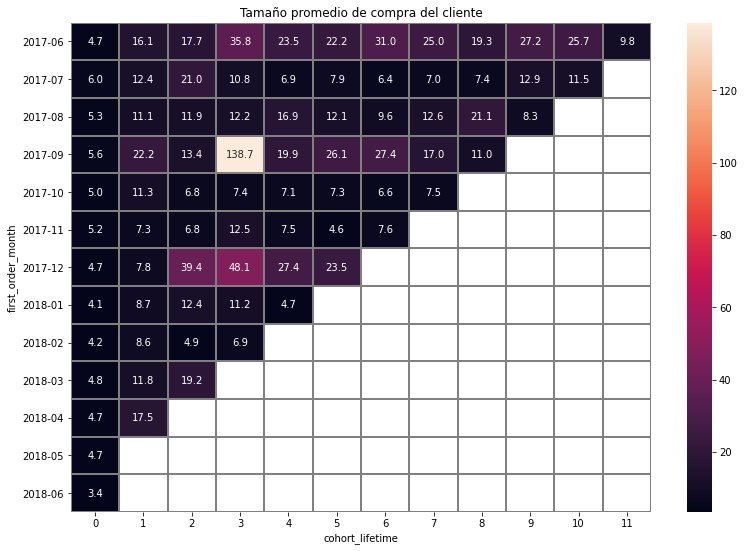

In [60]:
plt.figure(figsize=(13, 9))
plt.title('Tamaño promedio de compra del cliente')
sns.heatmap(
    revenue_per_user_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)

El tamaño de compra promedio de la cohorte de septiembre de 2017 realmente se destaca. La cohorte de diciembre 2017 también muestra un comportamiento interesante: la compra promedio aumenta en el segundo y tercer mes. Esto probablemente se debió a pedidos adicionales de varios usuarios. El grafico no muestra tamaños grandes de compra por parte de los usuarios.

### MARKETING 

A continuación se analiza cuánto dinero se gastó por fuente de anuncio, el costo de adquirir un cliente y la rentabilidad de la inversión. 

In [61]:
# Dinero gastado total, por fuente y a lo largo del tiempo
# Adquisición de clientes de cada una de las fuentes 
# Rentabilidad de las inversiones (ROI)

In [62]:
cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [63]:
cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [64]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [65]:
margin_rate = 0.5

report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head()

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0
1,2017-06-01,2023,2017-07-01,981.82,490.910,1
2,2017-06-01,2023,2017-08-01,885.34,442.670,2
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4


A continuación se calcula LTV (lifetime value), el cual es el valor de vida del cliente. Es la cantidad total de dinero que un cliente aporta a una empresa. 

In [66]:
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round()

output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-07-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
2017-08-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,
2017-09-01,3.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,,,
2017-10-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,
2017-11-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,
2017-12-01,2.0,0.0,0.0,1.0,0.0,0.0,,,,,,
2018-01-01,2.0,0.0,0.0,0.0,0.0,,,,,,,
2018-02-01,2.0,0.0,0.0,0.0,,,,,,,,


In [67]:
costs['month'] = costs['dt'].astype('datetime64[M]') 

In [68]:
# calcular los costos por mes
monthly_costs = costs.groupby('month').sum()
monthly_costs.head()

,costs
month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88


<div class="alert alert-block alert-success">
<b>Comentario del Revisor:</b> <a class="tocSkip"></a><br>
- Excelente análisis de los ingresos por usuario a lo largo del tiempo. Observar esta tendencia es crucial para la estrategia de ventas. 
</div>

A continuación se calculará el CAC de los cohortes. CAC es el costo de adquirir un cliente nuevo a la empresa.

In [69]:
report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head()

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3,0.477336,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4,0.511265,18015.0,8.905091


A continuación se analiza el retorno de la inversión en la campaña publicitaria. También llamado Romi. 

In [70]:
report_['romi'] = report_['ltv'] / report_['cac']
output = report_.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)

output.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.27,0.29,0.32,0.37,0.43,0.47,0.52,0.56,0.59,0.62,0.65,0.67
2017-07-01,0.32,0.33,0.37,0.39,0.40,0.40,0.41,0.42,0.43,0.43,0.44,NaN
2017-08-01,0.24,0.27,0.29,0.31,0.33,0.34,0.35,0.37,0.38,0.39,NaN,NaN
2017-09-01,0.30,0.36,0.39,0.60,0.62,0.65,0.69,0.70,0.71,NaN,NaN,NaN
2017-10-01,0.30,0.33,0.34,0.35,0.36,0.37,0.37,0.38,NaN,NaN,NaN,NaN
2017-11-01,0.28,0.30,0.31,0.33,0.34,0.34,0.34,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.27,0.29,0.34,0.40,0.42,0.44,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.21,0.22,0.24,0.25,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.23,0.25,0.25,0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se observa que a lo largo de los meses la relación beneficio/gastos a aumentado, sin embargo no alcanza al 100% de recuperación de la inversión, ni con un beneficio adicional. 

A continuación se averigua qué tan rápido empiezan a compensar las cohortes en promedio.

In [71]:
output.cumsum(axis=1).mean(axis=0)

age
0     0.270408
1     0.290992
2     0.315535
3     0.359870
4     0.391473
5     0.429938
6     0.448410
7     0.484976
8     0.526936
9     0.482244
10    0.547329
11    0.666991
dtype: float64

En promedio, las cohortes no compensan la inversión a partir de ninguno de los meses señalados. El negocio no parece próspero y se debe tomar medidas correctivas para que Y.AFISHA empiece a recuperarse. 

## CONCLUSIÓN

1. La duración de una sesión promedio difiere segun el dispositivo de uso. <br>
2. Se observa que los ingresos por usuario disminuyen con el pasar del tiempo.<br>
3. No se muestra tamaños grandes de compra por parte de los usuarios.<br>
4. No se alcanza al 100% de recuperación de la inversión. <br>
5. El negocio necesita nuevas estrategias para aumentar ventas y retener a sus usuarios con el tiempo, ofreciendo excelente calidad de productos y servicios. 